In [1]:
from pprint import pprint as prt
import string
from string import digits
import re
from nltk.tokenize import word_tokenize,sent_tokenize
from collections import defaultdict as dd
import gensim
from gensim import corpora
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
#opening the document 
#used first few chapters of "NIDNIGHT CHILDREN" and converting in lower case letters
file = open(r"ELEVEN STORIES BY PREMCHAND.txt",).read()
premchand= file.lower().replace("\n"," ").replace("-","").replace("'s",'').replace("'",'')

In [3]:
# Removing Digits
dig = str.maketrans('', '', digits) 
story = premchand.translate(dig) 
story

'eleven stories by premchand   in banaras district there is a village called bira in which an old, childless widow used to live. she was a gond woman named bhungi and she didnt own either a scrap of land or a house to live in. her only source of livelihood was a parching oven. the village folk customarily have one meal a day of parched grains, so there was always a crowd around bhungi oven. whatever grain she was paid for parching she would grind or fry and eat it. she slept in a corner of the same little shack that sheltered the oven. as soon as it was light shed get up and go out to gather dry leaves from all around to make her fire. she would stack the leaves right next to the oven, and after twelve, light the fire. but on the days when she had to parch grain for pandit udaybhan pandey, the owner of the village, she went to bed hungry. she was obliged to work without pay for pandit udaybhan pandey she also had to fetch water for his house. and, for this reason, from time to time the

In [4]:
stopwords=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your',
           'yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',
           "it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this',
           'that',"that'll",'these','how','these','those','am','is','are','was','were','be','been','being','have',
           'has','had','having','do','does','did','done','doing','a','an','the','and','but','if','or','because',
           'as','until','while','of','at','by','for','with','about','against','between','into','through','during',
           'before','after','above','below','to','from','up','down','in','out','on','off','further','then','once',
           'here','there','when','where','why','how','all','any','both','each','few','more','most','other','some',
           'such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don',
           "don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",
           'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',
           "mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',
           "weren't",'won',"won't",'wouldn',"wouldn't","won't", "What's",'although','bit',"i've",'much','more',"there's",
           "You've",'got',"i'd",'moreover','would','could','like','mr.','but',"i'm",'get','ought',"'",'onto','ive','must',
           'went','many','whats','id','let','yet','im','thatll','theyre','youll',"n't", "'s",'oh',"'ll",'th','..']

In [5]:
p=string.punctuation
print('\nNO OF PUNCTUATIONS:-',len(p),'\nPUNCTUATIONS:-\t',p)


NO OF PUNCTUATIONS:- 32 
PUNCTUATIONS:-	 !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
#word tokenization 
token= word_tokenize(story)

In [7]:
#removing stop words and punctuations
premchand=[]

for i in token:
    if i not in p:
        if i not in stopwords:
            premchand.append(i)

In [8]:
print("No of Tokenized word found-",len(token),
     "\nNo of Words after removing stopwords-",len(premchand),
     "\nNo of words dropped-", len(token)-len(premchand))

No of Tokenized word found- 23016 
No of Words after removing stopwords- 9761 
No of words dropped- 13255


In [9]:
print(premchand)

['eleven', 'stories', 'premchand', 'banaras', 'district', 'village', 'called', 'bira', 'old', 'childless', 'widow', 'used', 'live', 'gond', 'woman', 'named', 'bhungi', 'didnt', 'either', 'scrap', 'land', 'house', 'live', 'source', 'livelihood', 'parching', 'oven', 'village', 'folk', 'customarily', 'one', 'meal', 'day', 'parched', 'grains', 'always', 'crowd', 'around', 'bhungi', 'oven', 'whatever', 'grain', 'paid', 'parching', 'grind', 'fry', 'eat', 'slept', 'corner', 'little', 'shack', 'sheltered', 'oven', 'soon', 'light', 'shed', 'go', 'gather', 'dry', 'leaves', 'around', 'make', 'fire', 'stack', 'leaves', 'right', 'next', 'oven', 'twelve', 'light', 'fire', 'days', 'parch', 'grain', 'pandit', 'udaybhan', 'pandey', 'owner', 'village', 'bed', 'hungry', 'obliged', 'work', 'without', 'pay', 'pandit', 'udaybhan', 'pandey', 'also', 'fetch', 'water', 'house', 'reason', 'time', 'time', 'oven', 'lit', 'lived', 'pandit', 'village', 'therefore', 'full', 'authority', 'make', 'sort', 'odd', 'job',

In [10]:
#selecting words with
word_count = dd(int)
for i in premchand:
        word_count[i] += 1
        
print(word_count)

defaultdict(<class 'int'>, {'eleven': 2, 'stories': 1, 'premchand': 1, 'banaras': 1, 'district': 1, 'village': 38, 'called': 10, 'bira': 1, 'old': 18, 'childless': 1, 'widow': 6, 'used': 7, 'live': 7, 'gond': 1, 'woman': 8, 'named': 3, 'bhungi': 12, 'didnt': 36, 'either': 2, 'scrap': 1, 'land': 6, 'house': 34, 'source': 1, 'livelihood': 3, 'parching': 5, 'oven': 17, 'folk': 3, 'customarily': 1, 'one': 91, 'meal': 7, 'day': 45, 'parched': 2, 'grains': 1, 'always': 14, 'crowd': 6, 'around': 31, 'whatever': 6, 'grain': 15, 'paid': 5, 'grind': 2, 'fry': 1, 'eat': 19, 'slept': 1, 'corner': 2, 'little': 29, 'shack': 1, 'sheltered': 1, 'soon': 18, 'light': 4, 'shed': 12, 'go': 44, 'gather': 3, 'dry': 7, 'leaves': 11, 'make': 22, 'fire': 26, 'stack': 1, 'right': 29, 'next': 9, 'twelve': 3, 'days': 14, 'parch': 5, 'pandit': 11, 'udaybhan': 6, 'pandey': 2, 'owner': 3, 'bed': 3, 'hungry': 2, 'obliged': 1, 'work': 33, 'without': 24, 'pay': 20, 'also': 10, 'fetch': 3, 'water': 33, 'reason': 2, 'tim

In [11]:
# Only keep words that appear more than once
premchand_corpus=[]
for key ,value in word_count.items():
    if value>1:
        premchand_corpus.append(key)

In [12]:
print("NO OF WORDS FOUND:",len(premchand_corpus))

NO OF WORDS FOUND: 1315


In [13]:
print(premchand_corpus)

['eleven', 'village', 'called', 'old', 'widow', 'used', 'live', 'woman', 'named', 'bhungi', 'didnt', 'either', 'land', 'house', 'livelihood', 'parching', 'oven', 'folk', 'one', 'meal', 'day', 'parched', 'always', 'crowd', 'around', 'whatever', 'grain', 'paid', 'grind', 'eat', 'corner', 'little', 'soon', 'light', 'shed', 'go', 'gather', 'dry', 'leaves', 'make', 'fire', 'right', 'next', 'twelve', 'days', 'parch', 'pandit', 'udaybhan', 'pandey', 'owner', 'bed', 'hungry', 'work', 'without', 'pay', 'also', 'fetch', 'water', 'reason', 'time', 'lit', 'lived', 'full', 'sort', 'job', 'received', 'food', 'working', 'favour', 'spring', 'eaten', 'given', 'houses', 'put', 'good', 'use', 'today', 'fair', 'scarcely', 'opportunity', 'draw', 'breath', 'customer', 'squabbles', 'kept', 'two', 'servants', 'arrived', 'carrying', 'basket', 'order', 'away', 'saw', 'baskets', 'already', 'even', 'stay', 'dark', 'despair', 'took', 'said', 'dont', 'waste', 'sorry', 'began', 'laughing', 'matter', 'whole', 'keep',

In [14]:
#creating dictionary
premchand_dictionary = corpora.Dictionary([premchand_corpus])
print(premchand_dictionary)

Dictionary(1315 unique tokens: ["''", '...', '``', 'abandoned', 'able']...)


In [15]:
#as the dictionary is created we can check it along with the unique number allocated to it

dict_refr=premchand_dictionary.token2id
dict_refr

{"''": 0,
 '...': 1,
 '``': 2,
 'abandoned': 3,
 'able': 4,
 'abundance': 5,
 'abuse': 6,
 'abusing': 7,
 'accept': 8,
 'according': 9,
 'across': 10,
 'acted': 11,
 'actually': 12,
 'advanced': 13,
 'advice': 14,
 'affection': 15,
 'afraid': 16,
 'afternoon': 17,
 'afterwards': 18,
 'again': 19,
 'agree': 20,
 'ahead': 21,
 'air': 22,
 'alarakkhi': 23,
 'ali': 24,
 'almost': 25,
 'alone': 26,
 'along': 27,
 'already': 28,
 'also': 29,
 'always': 30,
 'among': 31,
 'amount': 32,
 'anger': 33,
 'angrily': 34,
 'angry': 35,
 'animal': 36,
 'animals': 37,
 'annas': 38,
 'another': 39,
 'answer': 40,
 'answered': 41,
 'anybody': 42,
 'anyone': 43,
 'anything': 44,
 'anyway': 45,
 'apart': 46,
 'appetite': 47,
 'approach': 48,
 'arent': 49,
 'arms': 50,
 'army': 51,
 'around': 52,
 'arrey': 53,
 'arrive': 54,
 'arrived': 55,
 'ashamed': 56,
 'ashes': 57,
 'aside': 58,
 'ask': 59,
 'asked': 60,
 'asleep': 61,
 'assumed': 62,
 'astonished': 63,
 'ate': 64,
 'attention': 65,
 'auction': 66,
 '

In [16]:
sentences = sent_tokenize(story)
tokens=[]
for i in sentences:
    tokens.append(word_tokenize(i))
print("No of Tokenized list of word found-",len(tokens))

No of Tokenized list of word found- 1553


In [17]:
# Training the Word2Vec model
model = Word2Vec(tokens,min_count=1)
words = model.wv.vocab

In [18]:
# Testing the word vectors
vector = model.wv['afterwards']
print(vector)

[-1.26948925e-02 -8.11091810e-03  8.52919836e-03  1.79463997e-02
 -2.61978265e-02 -7.12561095e-03 -1.75467636e-02  2.47633434e-03
 -8.42109043e-03  6.94646779e-03  5.61071327e-03  1.66562796e-02
 -1.82121601e-02 -2.74581392e-03 -1.88177056e-03  4.35856692e-02
 -3.38300243e-02 -4.45543751e-02  5.68415560e-02  3.22231390e-02
 -1.24035897e-02  2.75107138e-02 -2.04869616e-03  1.31582310e-02
 -3.26108672e-02  1.92036678e-03 -1.86735038e-02 -1.92158893e-02
 -1.06379576e-02  2.38771038e-03  9.55688301e-03 -4.58223280e-03
 -2.31918227e-02 -1.02122733e-02 -6.69774506e-03 -1.81365339e-03
  4.20757607e-02 -5.12230443e-03  1.30131645e-02 -4.04875726e-02
  5.63802943e-03  2.41721068e-02 -2.93292813e-02 -9.44823772e-03
  1.83575097e-02 -3.17128189e-02  1.30803492e-02  1.15700262e-02
  3.56621630e-02  1.24121830e-02  1.68683492e-02  2.60461681e-02
  2.53404099e-02 -2.17142161e-02 -8.34054127e-03  2.88312547e-02
  7.23130396e-03 -1.34252906e-02  2.36946857e-03 -2.02133488e-02
 -1.63975656e-02  1.51986

In [19]:
#finding similar words
sample=['village','cook','basket','gift','dhoti','defeat','eat','edge','edifice','effort','owner','answer','friendship',
       'battle','book','enemy','brahman','ceremony','great','happy','breaking','dead','clients']
print("TEST WORDS:",len(sample))

TEST WORDS: 23


In [20]:
for i in sample:
    similar_word= model.wv.most_similar(i,topn=3)
    print('similar words of ',i.upper(),'\n','--'*10, '\n')
    print(similar_word)
    print("\n")

similar words of  VILLAGE 
 -------------------- 

[('of', 0.9998171329498291), ('a', 0.9998114109039307), ('and', 0.9998111724853516)]


similar words of  COOK 
 -------------------- 

[('every', 0.9968198537826538), ('get', 0.9967883825302124), ('only', 0.9967600703239441)]


similar words of  BASKET 
 -------------------- 

[('on', 0.9990847110748291), ('out', 0.9990442991256714), ('his', 0.9990313053131104)]


similar words of  GIFT 
 -------------------- 

[('carsplashing', 0.8589001297950745), ('opened', 0.8526598215103149), ('beyond', 0.8491118550300598)]


similar words of  DHOTI 
 -------------------- 

[('jhuri', 0.9823884963989258), ('suddenly', 0.9822436571121216), ('hold', 0.9821178317070007)]


similar words of  DEFEAT 
 -------------------- 

[('failed', 0.9722462296485901), ('isnt', 0.9721720814704895), ('next', 0.9718689918518066)]


similar words of  EAT 
 -------------------- 

[('only', 0.9996709227561951), ('and', 0.9996677041053772), ('had', 0.9996646046638489)]



In [21]:
model.wv.similarity(w1='premchand',w2='premchand')

1.0

In [22]:
sample1=['burning','blood','midnight','gift','basket','gift','dhoti','friendship','clothes','greetings','police','smoke','morning','breaking'
       ,'sleep','human','food','poor','brahman','ceremony','great','happy','death','dharma','english']
print("TEST WORDS:",len(sample1))

TEST WORDS: 25


In [23]:
words = []
vectors = []
x= []
y = []

for i in sample1:
    vectors.append(model[i])  #it'll add the vector representation of the word to the list specified
    words.append(i)       #it'll simly add the word to the list specified
    
tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
coordinates = tsne_model.fit_transform(vectors)
for value in coordinates:
    x.append(value[0])
    y.append(value[1])

C:\Users\SAURABH UPADHYAY\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


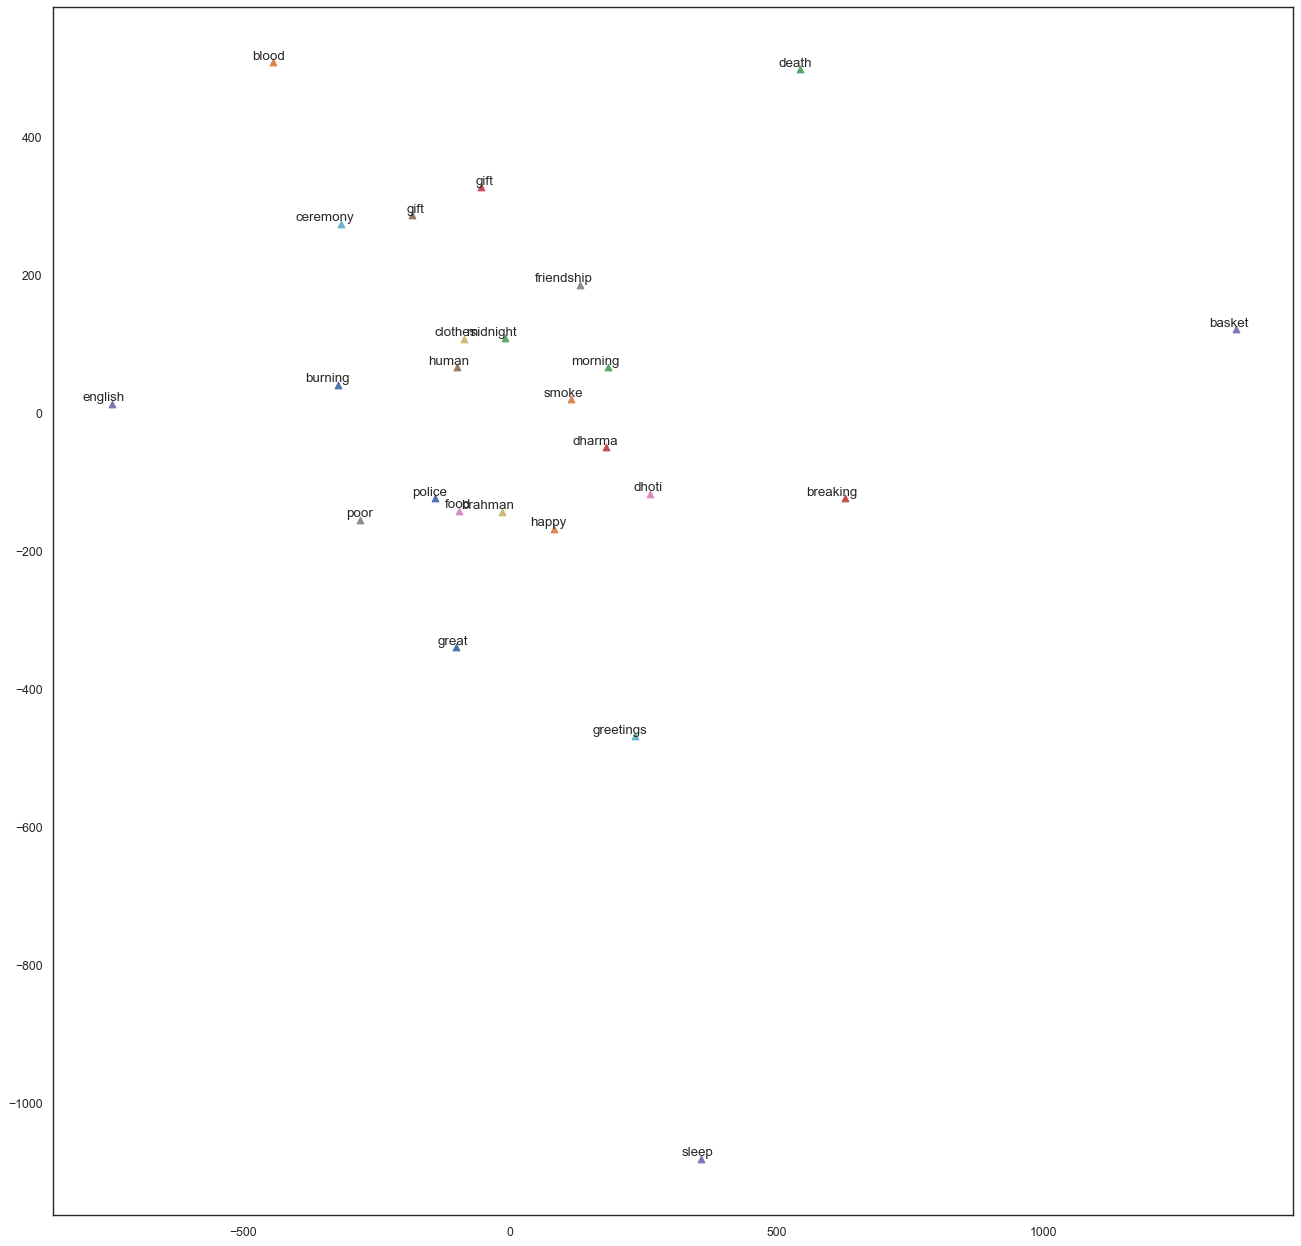

In [24]:
plt.figure(figsize=(20,20),dpi=80)
sns.set_context('poster',font_scale=4)
sns.set(style='white')
for i in range(len(x)):
    plt.scatter(x[i],y[i],marker='^')
    plt.annotate(words[i],xy=(x[i], y[i]),xytext=(11,11),textcoords='offset points',
            horizontalalignment='right', verticalalignment='top')
plt.show()